In [6]:
import pandas as pd
data=pd.read_csv('tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [7]:
from sklearn.preprocessing import LabelEncoder
outlook=LabelEncoder()
temp=LabelEncoder()
humidity=LabelEncoder()
wind=LabelEncoder()
play=LabelEncoder()
data['outlook']=outlook.fit_transform(data['outlook'])
data['temp']=outlook.fit_transform(data['temp'])
data['humidity']=outlook.fit_transform(data['humidity'])
data['windy']=outlook.fit_transform(data['windy'])
data['play']=outlook.fit_transform(data['play'])
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [8]:
features_cols=['outlook','temp','humidity','windy']
x=data[features_cols]
y=data.play
print(x)
print()
print(y)

    outlook  temp  humidity  windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     2         1      0
10        2     2         1      1
11        0     2         0      1
12        0     1         1      0
13        1     2         0      1

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
classifier.predict(x_test)

array([0, 1, 1])

In [13]:
x_test


,outlook,temp,humidity,windy
11,0,2,0,1
12,0,1,1,0
5,1,0,1,1


In [14]:
y_test


,play
11,1
12,1
5,0


In [15]:

classifier.score(x_test,y_test)

0.3333333333333333

[Text(0.6666666666666666, 0.875, 'x[2] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.625, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.75, '  False')]

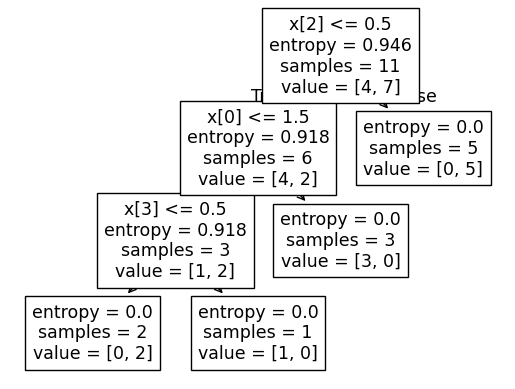

In [16]:
from sklearn import tree
tree.plot_tree(classifier)

In [17]:
clf = DecisionTreeClassifier(criterion='entropy')  # Using entropy to calculate information gain
clf.fit(x, y)
importances = clf.feature_importances_

# Create a DataFrame to see the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Information Gain': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Information Gain', ascending=False)

print(feature_importance_df)

    Feature  Information Gain
0   outlook          0.362629
3     windy          0.274205
2  humidity          0.211237
1      temp          0.151929
